# Part I - Citi Bike Data Exploration 
## by Abdalhameed Saad

## Introduction
Citi Bike is New York City’s bike share system, and the largest in the nation. Citi Bike launched in May 2013 and has become an essential part of transportation network. They make commute fun, efficient and affordable – not to mention healthy and good for the environment.

Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? Discovering the answers to these questions and more.

#### Content 


Trip duration


Start time


Stop time


Start station id


Start station name


Start station latitude


Start station longitude


End station id


End station name


End station latitude


End station longitude


Bikeid


Birth year


User type - (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)


Gender - (Zero=unknown; 1=male; 2=female)


## Preliminary Wrangling


# importing libraries

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import zipfile
import requests
import io
%matplotlib inline

# Gatharing

In [2]:
zf1 = zipfile.ZipFile('202001-citibike-tripdata.csv.zip') 
zf2 = zipfile.ZipFile('202002-citibike-tripdata.csv.zip') 
zf3 = zipfile.ZipFile('202003-citibike-tripdata.csv.zip') 
zf4 = zipfile.ZipFile('202004-citibike-tripdata.csv.zip') 
df1 = pd.read_csv(zf1.open('202001-citibike-tripdata.csv'))
df2 = pd.read_csv(zf2.open('202002-citibike-tripdata.csv'))
df3 = pd.read_csv(zf3.open('202003-citibike-tripdata.csv'))
df4 = pd.read_csv(zf4.open('202004-citibike-tripdata.csv'))

> the next two cells is for downloading the files directly using requests 

In [122]:
#def get_data(month):
#    re = requests.get(f'https://s3.amazonaws.com/tripdata/2020{month}-citibike-tripdata.csv.zip')
#    zf = zipfile.ZipFile(io.BytesIO(re.content)) 
#    csvf = zf.open(f'2020{month}-citibike-tripdata.csv')
#    df = pd.read_csv(csvf)
#    df.to_csv(f'2020{month}-citibike-tripdata.csv',index= False)

In [123]:
#get_data('01')
#get_data('02')
#get_data('03')
#get_data('04')

# Assessing phase 1

In [125]:
df1.sample(3).T

,611346,1013176,1099071
tripduration,702,955,1089
starttime,2020-01-15 17:43:41.7420,2020-01-27 08:33:46.7510,2020-01-28 22:07:43.1780
stoptime,2020-01-15 17:55:24.1580,2020-01-27 08:49:41.8040,2020-01-28 22:25:53.0420
start station id,3814,3697,3467
start station name,E 56 St & Madison Ave,W 64 St & Thelonious Monk Circle,W Broadway & Spring St
start station latitude,40.761573,40.77516,40.724947
start station longitude,-73.972628,-73.989187,-74.001659
end station id,3167,3255,523
end station name,Amsterdam Ave & W 73 St,8 Ave & W 31 St,W 38 St & 8 Ave
end station latitude,40.779668,40.750585,40.754666


In [126]:
df2.sample(3).T

,841692,127269,1028756
tripduration,252,805,923
starttime,2020-02-22 22:11:06.8210,2020-02-04 08:46:53.0780,2020-02-26 21:33:46.3430
stoptime,2020-02-22 22:15:19.0970,2020-02-04 09:00:18.9640,2020-02-26 21:49:09.5360
start station id,308,359,461
start station name,St James Pl & Oliver St,E 47 St & Park Ave,E 20 St & 2 Ave
start station latitude,40.713079,40.755103,40.735877
start station longitude,-73.998512,-73.974987,-73.98205
end station id,224,3463,342
end station name,Spruce St & Nassau St,E 16 St & Irving Pl,Columbia St & Rivington St
end station latitude,40.711464,40.735367,40.7174


In [127]:
df3.sample(3).T

,871081,903699,922540
tripduration,1932,98,1156
starttime,2020-03-20 17:21:48.4800,2020-03-21 16:32:17.9610,2020-03-22 14:22:28.9310
stoptime,2020-03-20 17:54:01.0250,2020-03-21 16:33:56.9480,2020-03-22 14:41:45.8680
start station id,3870,3170,250
start station name,Melrose St & Broadway,W 84 St & Columbus Ave,Lafayette St & Jersey St
start station latitude,40.697481,40.785,40.724561
start station longitude,-73.935877,-73.972834,-73.995653
end station id,3064,3168,3785
end station name,Myrtle Ave & Lewis Ave,Central Park West & W 85 St,W 42 St & 6 Ave
end station latitude,40.69682,40.784727,40.75492


In [128]:
df4.sample(3).T

,397281,132633,425022
tripduration,2224,218,3431
starttime,2020-04-19 14:12:12.6310,2020-04-07 09:15:17.7960,2020-04-19 21:05:21.7240
stoptime,2020-04-19 14:49:17.2000,2020-04-07 09:18:55.8590,2020-04-19 22:02:33.6840
start station id,3134,450,439
start station name,3 Ave & E 62 St,W 49 St & 8 Ave,E 4 St & 2 Ave
start station latitude,40.763126,40.762272,40.726281
start station longitude,-73.965269,-73.987882,-73.98978
end station id,3528,477,530
end station name,Steinway St & 23 Ave,W 41 St & 8 Ave,11 Ave & W 59 St
end station latitude,40.771394,40.756405,40.771497


In [3]:
#make copy of the three dataframe
df1_clean =df1.copy()
df2_clean =df2.copy()
df3_clean =df3.copy()
df4_clean =df4.copy()

each dataframe represents one month so I added the month column for each data frame to make it easier when compin it into one 
dataframe

In [4]:
#create month table for each dataframe
df1_clean['month'] = 'Jan'
df2_clean['month'] = 'Feb'
df3_clean['month'] = 'Mar'
df4_clean['month'] = 'Apr'

In [5]:
df1_clean.sample(2).T

,355487,771117
tripduration,1079,465
starttime,2020-01-10 17:45:40.7970,2020-01-21 05:25:23.1590
stoptime,2020-01-10 18:03:40.0920,2020-01-21 05:33:08.9040
start station id,402,379
start station name,Broadway & E 22 St,W 31 St & 7 Ave
start station latitude,40.740343,40.749156
start station longitude,-73.989551,-73.9916
end station id,447,536
end station name,8 Ave & W 52 St,1 Ave & E 30 St
end station latitude,40.763707,40.741444


check if all columns in the dataframe are a match

In [6]:
df1_clean.columns == df2_clean.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [7]:
df3_clean.columns == df4_clean.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [8]:
df1_clean.columns == df4_clean.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [9]:
print(df1_clean.shape)
print(df2_clean.shape)
print(df3_clean.shape)
print(df4_clean.shape)

(1240596, 16)
(1146830, 16)
(1068457, 16)
(682762, 16)


all columns are match so it will be ok to combine it al together 

In [10]:
#use concat function from pandas to  combine all datafreams
df = pd.concat([df1_clean, df2_clean,df3_clean,df4_clean])

In [11]:
#test 
df.shape

(4138645, 16)

In [12]:
#save the dataframe into citibike_Jan_to_Apr.csv
df.to_csv('citibike_Jan_to_Apr.csv',index=False)

## 1) Quality
 
#### 
- wrong data type
- outliers in the tripduration column
- replace spaces in the columns names to underscore
- unusual birth year value counts for the year 1969
- outliers in tripduration column 
- trip duration should be in minutes not sec
- outliers in the people's ages 
- genders represented by number


## 2) tidiness
- birth year column should be age to make it easier during  EDA
- 2 more variable inside this starttime column (weekday and hour for starting time)

In [4]:
df_final = pd.read_csv('citibike_Jan_to_Apr.csv')

In [5]:
#make copy for cleaning
df_clean = df_final.copy()

# Assessing phase 2

In [6]:
df_clean.sample(10).T

,1070579,972046,2628317,1563957,3497436,3611053,3961121,103211,2382075,493890
tripduration,343,270,706,658,1297,603,3137,687,700,625
starttime,2020-01-28 11:54:39.4260,2020-01-26 09:08:02.7540,2020-03-05 18:01:16.3210,2020-02-09 10:32:26.9220,2020-04-03 10:16:23.0030,2020-04-08 08:27:53.9370,2020-04-23 19:09:57.7780,2020-01-04 13:47:48.0620,2020-02-29 18:12:54.3210,2020-01-13 09:35:58.8130
stoptime,2020-01-28 12:00:23.0440,2020-01-26 09:12:33.0830,2020-03-05 18:13:03.1720,2020-02-09 10:43:25.7040,2020-04-03 10:38:00.5110,2020-04-08 08:37:57.1080,2020-04-23 20:02:15.2130,2020-01-04 13:59:15.2700,2020-02-29 18:24:34.5490,2020-01-13 09:46:24.3740
start station id,164,3697,262,3737,3664,3141,3177,387,3383,440
start station name,E 47 St & 2 Ave,W 64 St & Thelonious Monk Circle,Washington Park,Stanton St & Norfolk St,North Moore St & Greenwich St,1 Ave & E 68 St,W 84 St & Broadway,Centre St & Chambers St,Cathedral Pkwy & Broadway,E 45 St & 3 Ave
start station latitude,40.753231,40.77516,40.691782,40.720747,40.720195,40.765005,40.786795,40.712733,40.804213,40.752554
start station longitude,-73.970325,-73.989187,-73.97373,-73.986274,-74.010301,-73.958185,-73.977112,-74.004607,-73.966991,-73.972826
end station id,484,3175,3055,3263,466,3151,3364,297,3542,486
end station name,W 44 St & 5 Ave,W 70 St & Amsterdam Ave,Greene Ave & Nostrand Ave,Cooper Square & Astor Pl,W 25 St & 6 Ave,E 81 St & York Ave,Carroll St & 5 Ave,E 15 St & 3 Ave,Amsterdam Ave & W 119 St,Broadway & W 29 St
end station latitude,40.755003,40.77748,40.688334,40.729515,40.743954,40.772838,40.675162,40.734232,40.808625,40.746201


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138645 entries, 0 to 4138644
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
 15  month                    object 
dtypes: float64(4), int64(6), object(6)
memory usage: 505.2+ MB


In [8]:
df_clean.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06,4.138645e+06
mean,1.020477e+03,1.772133e+03,4.073803e+01,-7.398048e+01,1.763834e+03,4.073772e+01,-7.398071e+01,3.315676e+04,1.979913e+03,1.173552e+00
std,1.184735e+04,1.508217e+03,3.103014e-02,2.039489e-02,1.508435e+03,3.085769e-02,2.045956e-02,8.156099e+03,1.244258e+01,5.250168e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.401713e+01,7.200000e+01,4.065540e+01,-7.407126e+01,1.453000e+04,1.885000e+03,0.000000e+00
25%,3.480000e+02,3.940000e+02,4.071757e+01,-7.399422e+01,3.930000e+02,4.071755e+01,-7.399456e+01,2.878100e+04,1.969000e+03,1.000000e+00
50%,6.040000e+02,5.230000e+02,4.073902e+01,-7.398369e+01,5.230000e+02,4.073827e+01,-7.398427e+01,3.486300e+04,1.983000e+03,1.000000e+00
75%,1.105000e+03,3.350000e+03,4.075929e+01,-7.396905e+01,3.350000e+03,4.075840e+01,-7.396962e+01,4.005700e+04,1.990000e+03,1.000000e+00
max,3.786187e+06,3.992000e+03,4.084284e+01,-7.389795e+01,3.992000e+03,4.084284e+01,-7.389795e+01,4.391200e+04,2.004000e+03,2.000000e+00


In [9]:
df_clean.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
month                      0
dtype: int64

In [10]:
# delete all rows with totla duration is more than 24 hours
indexAge = df_clean[df_clean.tripduration >86400].index
df_clean.drop(indexAge , inplace=True)
df_clean[df_clean.tripduration >86400]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month


In [11]:
#replace the (-) with an underscore in all columns
df_clean.rename(columns=lambda x: x.replace(' ','_'),inplace=True)

In [12]:
#test
df_clean.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'month'],
      dtype='object')

In [13]:
#check if there any other value for usertype
df_clean.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [14]:
df_clean.birth_year.value_counts()

1969    301771
1990    169461
1989    166087
1991    161453
1992    156060
         ...  
1927         3
1895         2
1915         2
1910         1
1926         1
Name: birth_year, Length: 107, dtype: int64

In [15]:
df_clean.shape

(4137191, 16)

since the data is from 2020, I subtracted the 2020 from the birth year

In [16]:
#create age column from birth data
df_clean['age'] = 2020 - df_clean['birth_year']

In [17]:
#test
df_clean['age'].value_counts()

51     301771
30     169461
31     166087
29     161453
28     156060
        ...  
93          3
125         2
105         2
110         1
94          1
Name: age, Length: 107, dtype: int64

In [18]:
age_u = df_clean.age > 90
age_u.sum()

2342

outliers in the people's ages so I limited the age for 90 as max


In [19]:
# delete all rows with age greater than 90
index_age = df_clean[df_clean.age >90].index
df_clean.drop(index_age , inplace=True)
df_clean[df_clean.age >90]

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,month,age


In [20]:
df_clean.gender.value_counts()

1    2871202
2     991035
0     272612
Name: gender, dtype: int64

In [21]:
#using lamda to change gender column to be more clear
df_clean['gender'] = df_clean['gender'].apply(lambda x: 'male' if x==1 else ('female' if x==2 else 'unknown'))

In [22]:
#test
df_clean.gender.value_counts()

male       2871202
female      991035
unknown     272612
Name: gender, dtype: int64

fix the data type for columns to allow for using the calculation functions


In [23]:
#fix the data type for columns to allow for using the calculation functions
df_clean.start_station_id = df_clean.start_station_id.astype('str')
df_clean.end_station_id = df_clean.end_station_id.astype('str')
df_clean['starttime']  = pd.to_datetime(df_clean.starttime, format='%Y-%m-%d %H:%M:%S')
df_clean['stoptime']  = pd.to_datetime(df_clean.stoptime, format='%Y-%m-%d %H:%M:%S')


In [24]:
#test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4134849 entries, 0 to 4138644
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth_year               int64         
 14  gender                   object        
 15  month                    object        
 16  age                      int64         
dtypes: datetime64[ns](2), float

*change the tripduration to minutes*

In [25]:
#divide the values by 60
df_clean['tripduration'] = df_clean['tripduration']/60
df_clean['tripduration'] = df_clean['tripduration'].round(1)

In [26]:
# Creating daytime and weekday columns
df_clean['weekday'] = df_clean['starttime'].dt.day_name()
df_clean['daytime'] = df_clean['starttime'].dt.hour

In [27]:
df_clean['weekday'] = pd.Categorical(df_clean['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)

In [28]:
df_clean.sample(10)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,month,age,weekday,daytime
577201,6.9,2020-01-15 07:21:37.044,2020-01-15 07:28:30.920,477,W 41 St & 8 Ave,40.756405,-73.990026,3233,E 48 St & 5 Ave,40.757246,-73.978059,38761,Subscriber,1990,male,Jan,30,Wednesday,7
3247159,10.4,2020-03-20 12:58:38.979,2020-03-20 13:09:04.559,317,E 6 St & Avenue B,40.724537,-73.981854,3687,E 33 St & 1 Ave,40.743227,-73.974498,41854,Subscriber,1989,male,Mar,31,Friday,12
597488,7.1,2020-01-15 13:43:32.358,2020-01-15 13:50:39.087,3724,7 Ave & Central Park South,40.766741,-73.979069,520,W 52 St & 5 Ave,40.759923,-73.976485,30580,Subscriber,1979,male,Jan,41,Wednesday,13
3221500,22.9,2020-03-19 11:39:35.978,2020-03-19 12:02:31.747,3056,Kosciuszko St & Nostrand Ave,40.690725,-73.951335,3585,Union St & Bedford Ave,40.669178,-73.955416,37548,Subscriber,1995,female,Mar,25,Thursday,11
4089404,5.7,2020-04-28 17:36:06.279,2020-04-28 17:41:46.598,411,E 6 St & Avenue D,40.722281,-73.976687,432,E 7 St & Avenue A,40.726218,-73.983799,40578,Subscriber,1989,female,Apr,31,Tuesday,17
2352817,5.6,2020-02-28 19:30:46.172,2020-02-28 19:36:21.751,3664,North Moore St & Greenwich St,40.720195,-74.010301,3783,Cliff St & Fulton St,40.708380,-74.004950,28707,Subscriber,1996,male,Feb,24,Friday,19
3888690,4.7,2020-04-20 13:10:35.142,2020-04-20 13:15:15.707,515,W 43 St & 10 Ave,40.760094,-73.994618,490,8 Ave & W 33 St,40.751551,-73.993934,27520,Subscriber,1984,male,Apr,36,Monday,13
381769,4.3,2020-01-11 11:19:17.261,2020-01-11 11:23:34.555,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,3553,Frederick Douglass Blvd & W 112 St,40.801694,-73.957145,15624,Subscriber,1991,male,Jan,29,Saturday,11
1055461,4.7,2020-01-28 07:30:13.622,2020-01-28 07:34:57.740,473,Rivington St & Chrystie St,40.721101,-73.991925,410,Suffolk St & Stanton St,40.720664,-73.985180,41206,Subscriber,1956,male,Jan,64,Tuesday,7
3695557,10.1,2020-04-12 09:12:30.381,2020-04-12 09:22:35.277,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3141,1 Ave & E 68 St,40.765005,-73.958185,43563,Subscriber,1991,male,Apr,29,Sunday,9


In [29]:
df_clean.tripduration.mean()

14.784670613122387

In [30]:
gkk = df_clean.groupby(['age','usertype'])['usertype'].count()

gkk[1:100]

age  usertype  
16   Subscriber       28
17   Customer        981
     Subscriber     2923
18   Customer       1953
     Subscriber     5053
                   ...  
63   Subscriber    30508
64   Customer        223
     Subscriber    25375
65   Customer        273
     Subscriber    22736
Name: usertype, Length: 99, dtype: int64

####  in the birth year column there is an outlier where the birth year is 1969, from the exploration it is shown that there are more than 200000 customers whose ages are 51, this indicates that when a new customer takes a ride the default date of birth is 1969.
> so we can't drop all those whose ages are 51 because it will skew the final result

### What is the structure of your dataset?

> the dataset is a compilation of four different datasets that represent 4 months in a row from January to April in the year 2022, there are more than 4 million trips in the data set with 19 features after doing some features engineering.
the dataset contains both qualitative and quantitative data.

### What is/are the main feature(s) of interest in your dataset?

> the most interesting feature in my dataset is the overall number of subscribers and customers and the differentiation between them and how does affect the behavior and the ride that are taken per weekday.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start time and weekday will have the greatest impact on the data, since they can be used to detect rush hour patterns

## Univariate Exploration

In [39]:
def sb_plot(data,xax,r,title):
    base_color = sb.color_palette()[0]
    sb.countplot(data=data, x=xax, color=base_color);
    plt.xticks(rotation=r);
    plt.title(title);

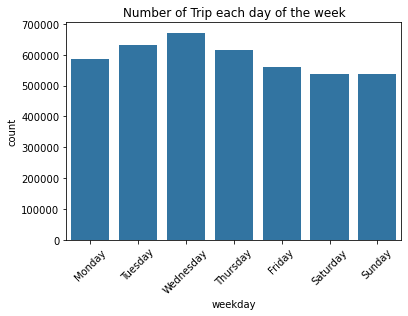

In [40]:
sb_plot(df_clean,'weekday',45,'Number of Trip each day of the week')

> There are more trips on Wednesday than any other day of the week according to the plot

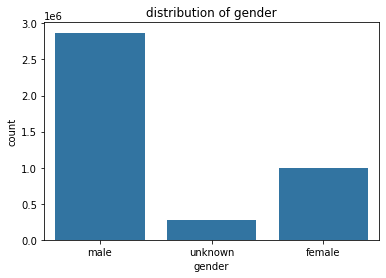

In [41]:
sb_plot(df_clean,'gender',0,'distribution of gender')

> the male gender has the most trip over female

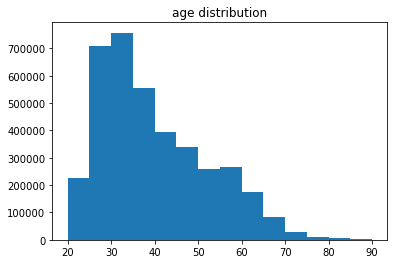

In [68]:
bins = np.arange(20, df_clean['age'].max()+5, 5)
plt.hist(df_clean.query("age != 51")['age'] , bins = bins);
plt.title('age distribution');

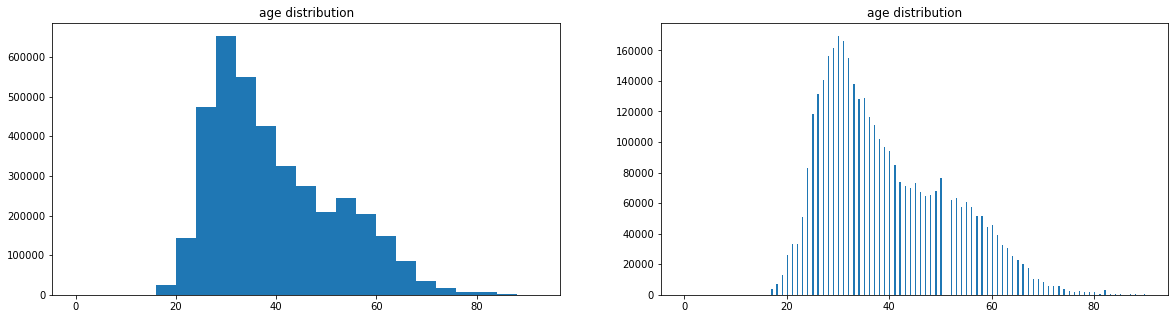

In [58]:
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, df_clean['age'].max()+4, 4)
plt.hist(data = df_clean.query("age != 51"), x = 'age', bins = bins);
plt.title('age distribution');
# histogram on right
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, df_clean['age'].max()+1/4, 1/4)
plt.hist(data = df_clean.query("age != 51"), x = 'age', bins = bins);
plt.title('age distribution');

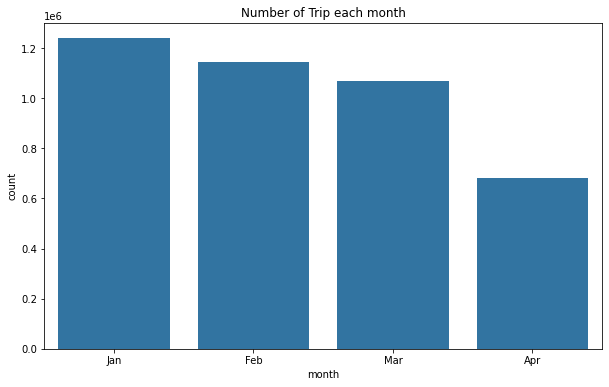

In [33]:
month_order = df_clean['month'].value_counts().index
plt.figure(figsize=[10,6])
sb.countplot(data = df_clean,x='month',order = month_order ,color =base_color)
plt.title('Number of Trip each month');

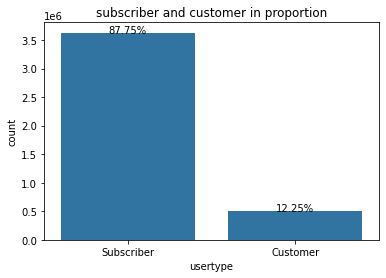

In [56]:
# ride frequency per usertype
ax = sb.countplot(data = df_clean, x = 'usertype',  color=sb.color_palette()[0])

total = len(df_clean)
for p in ax.patches:
    peropotion = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(peropotion, (x, y),ha='center')
plt.title('subscriber and customer in proportion');
plt.show();


> more than 87% of trips were taken by subscriber 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> people between the age of 30 to 35 has more trips than other age in the disruption,I only need to adjust the bin in the subplot.


> the male had more trips than other 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> in the birth year column there is an outlier where the birth year is 1969, from the exploration it is shown that there are more than 200000 customers whose ages are 51, this indicates that when a new customer takes a ride the default date of birth is 1969.
> so I can't drop all those whose ages are 51 because it will skew the final result , I used query to extract ages ar 51

## Bivariate Exploration

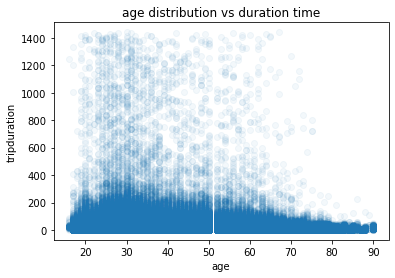

In [59]:
plt.scatter(data = df_clean.query("age != 51"), x = 'age', y = 'tripduration',alpha=1/20);
plt.xlabel('age')
plt.ylabel('tripduration')
plt.title('age distribution vs duration time');

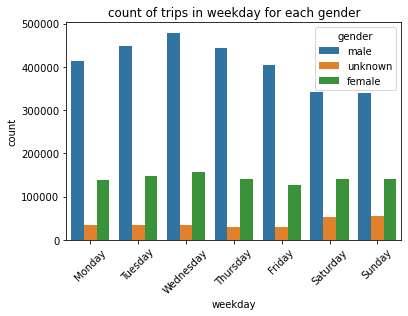

In [60]:
sb.countplot(data = df_clean, x = 'weekday', hue = 'gender');
plt.xticks(rotation=45);
plt.title('count of trips in weekday for each gender');

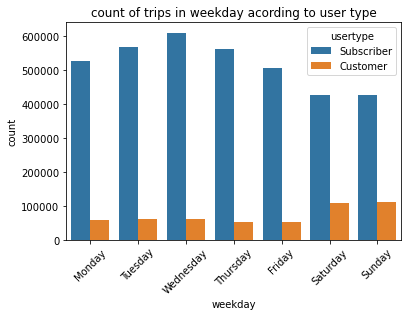

In [61]:
sb.countplot(data = df_clean, x = 'weekday', hue = 'usertype');
plt.xticks(rotation=45);
plt.title('count of trips in weekday acording to user type');

> From the previous chart, it can be seen that there is an increase in the number of trips for customers on holidays, which are Sunday and Monday, but on the other hand; the number of subscriber trips are decreasing on holiday

In [45]:
# Use group_by() and size() 
ct_counts = df_clean.groupby(['weekday', 'usertype']).size()

In [46]:
ct_counts = ct_counts.reset_index(name='count')

In [47]:
# Use DataFrame.pivot() to rearrange the data, to have weekday on rows
ct_counts = ct_counts.pivot(index = 'weekday', columns = 'usertype', values = 'count')

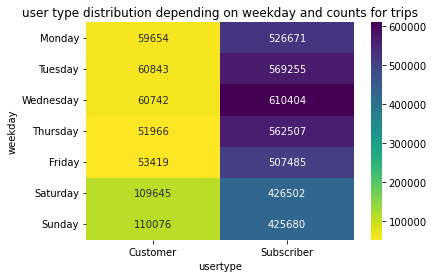

In [48]:
sb.heatmap(ct_counts, annot = True, fmt = 'd' ,cmap='viridis_r');
plt.title('user type distribution depending on weekday and counts for trips');

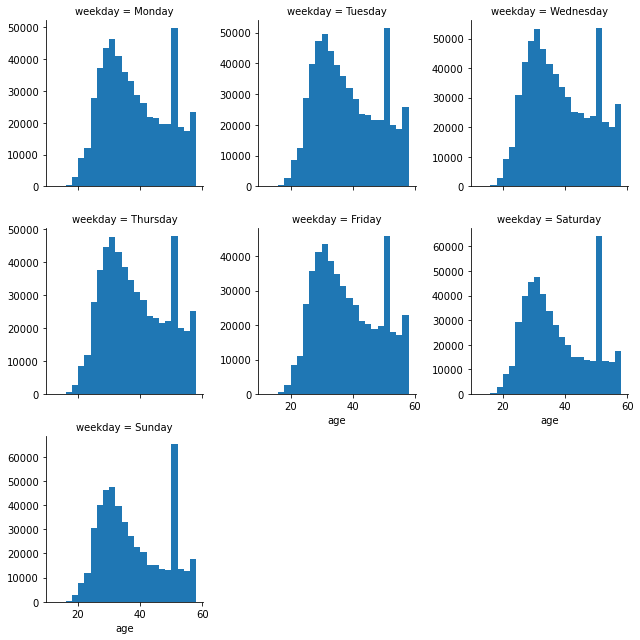

In [42]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = df_clean, col = 'weekday', col_wrap=3, sharey=False)
g.map(plt.hist, 'age', bins = bin_edges);
plt.title('user type distribution depending on weekday');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the previous plots, it can be seen that there is an increase in the number of trips for customers on holidays, which are Sunday and Monday, but on the other hand; the number of subscriber trips are decreasing on holiday
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> those whose ages between 25 and 30 tend to have more time in the duration of the trip

## Multivariate Exploration

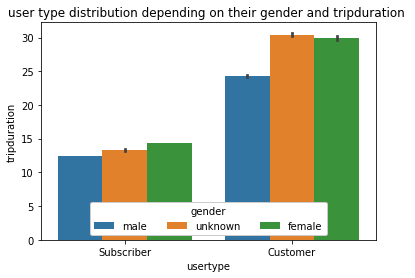

In [63]:
ax = sb.barplot(data = df_clean, x = 'usertype', y = 'tripduration', hue = 'gender');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender');
plt.title('user type distribution depending on their gender and tripduration ');

> tripduration for the female are more than male 

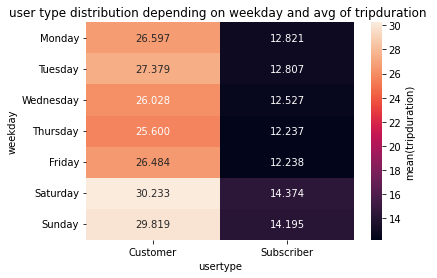

In [64]:
cat_means = df_clean.groupby(['usertype', 'weekday']).mean()['tripduration']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'weekday', columns = 'usertype',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(tripduration)'})
plt.title('user type distribution depending on weekday and avg of tripduration ');

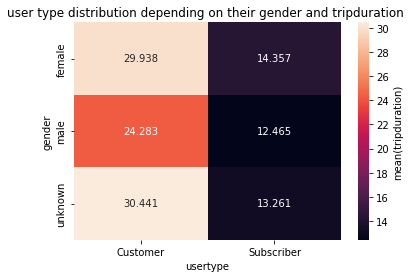

In [65]:
cat_means = df_clean.groupby(['usertype', 'gender']).mean()['tripduration']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'gender', columns = 'usertype',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(tripduration)'})
plt.title('user type distribution depending on their gender and tripduration ');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is evident that female customers had longer trips compared to male customers in the last plot, which shows there are clear differences between them.
> customers tend to have more trip duration than subscriber


> tripduration for the female are more than male

### Were there any interesting or surprising interactions between features?

> The average trip duration for subscribers is shorter by half than the average trip duration for users during normal weekdays. On holidays, the average trip duration for subscribers is double than the average trip duration for users.

## Conclusions
- There are more trips on Wednesday than any other day of the week according to the plot
- the male gender has the most trip over female
- more than 87% of trips were taken by subscriber
- users between the age of 30 to 35 has more trips than other age in the disruption,I only need to adjust the bin in the subplot.
- there is an increase in the number of trips for customers on holidays, which are Sunday and Monday, but on the other hand; the number of subscriber trips are decreasing on holiday
- those whose ages between 25 and 30 tend to have more time in the duration of the trip
- tripduration for the female are more than male
- The average trip duration for subscribers is shorter by half than the average trip duration for users during normal weekdays. On holidays, the average trip duration for subscribers is double than the average trip duration for users.
- It is evident that female customers had longer trips compared to male customers in the last plot, which shows there are clear differences between them. customers tend to have more trip duration than subscriber
 

## limitation
- in the birth year column there is an outlier where the birth year is 1969, from the exploration it is shown that there are more than 200000 customers whose ages are 51, this indicates that when a new customer takes a ride the default date of birth is 1969. so I can't drop all those whose ages are 51 because it will skew the final result , I used query to extract ages ar 51.


In [42]:
df_clean.to_csv('citibike_Jan_to_Apr2020_clean.csv',index=False)